##	Hypothesis:

Ho: There is no significant difference between platelets distributed between patients who died vs those who survived.

Ha: There is a significant difference between platelets distributed between patients who died vs who survived.


##	Data:

Data comes from Kaggle about 12 clinical features that can be used for predicting death events from heart failure caused by CVDs. 

It contains 299 observations and 13 variables. There are no missing / null values. 
The data set consists of variables, i.e age, anemia, diabetes, high-blood pressure, diabetes, platelets etc.. 


In [ ]:
import pandas as pd
import math
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt


In [ ]:
import seaborn as sns 
sns.set()

# suppress warnings (warnings do not prevent the code from executing)
import warnings
warnings.filterwarnings("ignore")

In [ ]:
cvd = pd.read_csv("data/Heart_Failure_causes.csv")

cvd.info()
cvd.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [ ]:
death_data = cvd[(cvd['DEATH_EVENT'] == 1)]
death_data.info()
no_death_data = cvd[(cvd['DEATH_EVENT'] == 0)]
no_death_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96 entries, 0 to 266
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       96 non-null     float64
 1   anaemia                   96 non-null     int64  
 2   creatinine_phosphokinase  96 non-null     int64  
 3   diabetes                  96 non-null     int64  
 4   ejection_fraction         96 non-null     int64  
 5   high_blood_pressure       96 non-null     int64  
 6   platelets                 96 non-null     float64
 7   serum_creatinine          96 non-null     float64
 8   serum_sodium              96 non-null     int64  
 9   sex                       96 non-null     int64  
 10  smoking                   96 non-null     int64  
 11  time                      96 non-null     int64  
 12  DEATH_EVENT               96 non-null     int64  
dtypes: float64(3), int64(10)
memory usage: 10.5 KB
<class 'pandas.core

##	Methods:

To perform the analysis, I split the data set into two main groups, A) the patients who died, B) the patients who survived, both having symptoms with CVDs disease.  

### A) Histogram Display

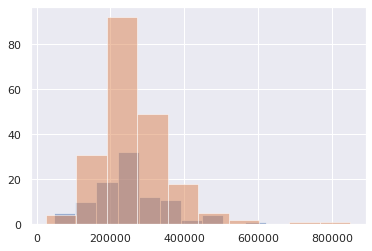

In [ ]:
# 1. histogram

plt.hist(death_data['platelets'], alpha = .5)
plt.hist(no_death_data['platelets'], alpha = .5)
plt.show()


In [ ]:
# skewness & kurtosis 

print(stats.describe(death_data['platelets']))
print(stats.describe(no_death_data['platelets']))

DescribeResult(nobs=96, minmax=(47000.0, 621000.0), mean=256381.04479166667, variance=9707310182.337015, skewness=0.6154641139319521, kurtosis=1.2378061872162185)
DescribeResult(nobs=203, minmax=(25100.0, 850000.0), mean=266657.4899014778, variance=9512335418.857391, skewness=1.870320834880945, kurtosis=8.3220356421857)


Hence it appears to be normally distributed from visuals, for both group of patients, a) who died and B) who survived.

Also confirmed from skewness & kurtosis for symtery... kurtosis is 8 in no_death_data, which is higher and shows more symetry to wards rightisde comparing to death_data.

### B) Confirming by t-test

p =value is > 0.05, which reflects getting fail to reject H0 hypothesis indicating there is no significancnt difference for 'platelets' distribution between the group a) death_data and b) no_death_data.

In [ ]:
# t-test

stats.ttest_ind(death_data['platelets'], no_death_data['platelets'])

Ttest_indResult(statistic=-0.8478681784251544, pvalue=0.3971941540413678)

 ### C) Seborn -
 visualizating the data for both groups, confirming the symetry

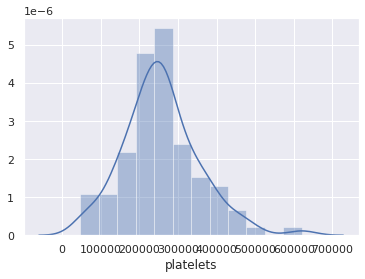

In [ ]:
dd = sns.distplot(death_data['platelets'])

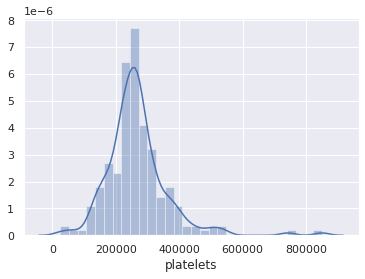

In [ ]:
ndd = sns.distplot(no_death_data['platelets'])

#### Comparing variables for finding relationship


Trying to compare 2 variables'platelets' and 'sodium_serum' to see if there is any relationship between these two. Result shows there is no relationship between them especially in death_data group.

however in no_death_group 'dodium_serum' increases having 'platelets' relatively constant..


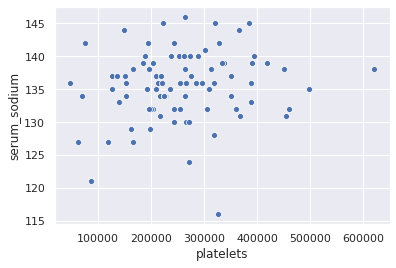

In [ ]:
sns.scatterplot(x='platelets', y='serum_sodium', data= death_data)

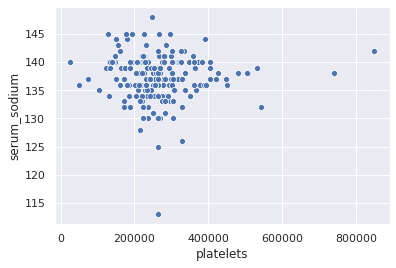

In [ ]:
sns.scatterplot(x='platelets', y='serum_sodium', data= no_death_data)

### D) Blox Plot

Box plot shows that 'platelets' appears to be normally distributed in both death_data and no_death_data groups. showing these are less contributed towards heart failure cause.

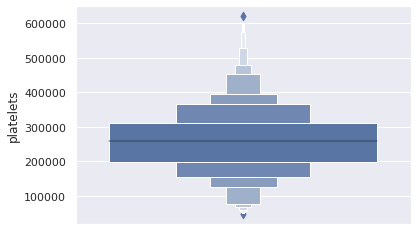

In [ ]:
sns.boxenplot(y='platelets', data= death_data)

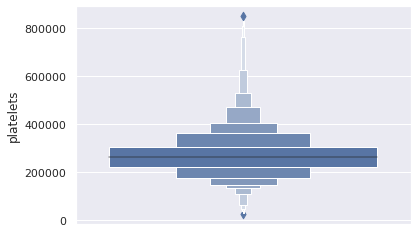

In [ ]:
sns.boxenplot(y='platelets', data= no_death_data)

### D) Confidence Interval - Getting 95% CI

In [ ]:
# Confidence interval


def get_95_ci(array_1, array_2):
    sample_1_n = array_1.shape[0]
    sample_2_n = array_2.shape[0]
    sample_1_mean = array_1.mean()
    sample_2_mean = array_2.mean()
    sample_1_var = array_1.var()
    sample_2_var = array_2.var()
    mean_difference = sample_2_mean - sample_1_mean
    std_err_difference = math.sqrt((sample_1_var/sample_1_n)+(sample_2_var/sample_2_n))
    margin_of_error = 1.96 * std_err_difference
    ci_lower = mean_difference - margin_of_error
    ci_upper = mean_difference + margin_of_error
    return("The difference in means at the 95% confidence interval (two-tail) is between "+str(ci_lower)+" and "+str(ci_upper)+".")

print(get_95_ci(death_data['platelets'], no_death_data['platelets']))




The difference in means at the 95% confidence interval (two-tail) is between -13566.099706320376 and 34118.989925942726.


## 5	Results:
Based on visual inspection, I concluded that ‘platelets’ are appeared to be normally distributed in both group of patients, and to confirm it I conducted t-test as well.  The result shows that a p-value of 0.39 which is higher than 0.05, so it fails to reject H0, describing that there is no significant difference in platelets for patients who died and those one who survived. 

On the other hand, 95% confidence interval suggests that the difference in average platelets between survived patients and non-survived patients is between -13566 and 34119. 


### 6.	Discussion & Recommendation:

This dataset contains almost 12 features which contribute to predict mortality. However, most of the variables do not have floating data instead have categorical / constant values which do not help much in the analysis. 
Only one feature ‘platelets’ is tested which appears to be normally distributed so doesn’t have significant effect on one group vs other.
Its recommended to collect more data which gives continuous/floating values making it possible to see the contribution of these features in cardio vascular diseases / heart failure. 

This could be helpful for public health authorities to see the trend and to raise awareness amongst people to modify / change their living habits for a health life. It’s also in the interest of public to watch how they can improve their living style to live a health life.
